# __Brough Lecture Notes: GARCH Models in R__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: April 1, 2019 <br>
<br>
<br>

In [15]:
require(rugarch)
require(zoo)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
ibm <- read.csv("./data/IBM-1999-2003.csv", header=T)

In [3]:
head(ibm)

PERMNO,date,TICKER,COMNAM,PERMCO,PRC,RET,CFACPR,RETX,sprtrn
12490,19990104,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,183.0000,-0.007458,2,-0.007458,-0.000919
12490,19990105,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,189.6250,0.036202,2,0.036202,0.013582
12490,19990106,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,188.7500,-0.004614,2,-0.004614,0.022140
12490,19990107,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,190.1875,0.007616,2,0.007616,-0.002051
12490,19990108,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,187.5625,-0.013802,2,-0.013802,0.004221
12490,19990111,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,189.2500,0.008997,2,0.008997,-0.008792


In [5]:
tail(ibm)

,PERMNO,date,TICKER,COMNAM,PERMCO,PRC,RET,CFACPR,RETX,sprtrn
1251,12490,20031223,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.79,-0.006425,1,-0.006425,0.002818
1252,12490,20031224,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.27,-0.005604,1,-0.005604,-0.001807
1253,12490,20031226,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.90,0.006828,1,0.006828,0.001691
1254,12490,20031229,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,93.52,0.006674,1,0.006674,0.012401
1255,12490,20031230,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.63,-0.009517,1,-0.009517,0.000144
1256,12490,20031231,IBM,INTERNATIONAL BUSINESS MACHS COR,20990,92.68,0.000540,1,0.000540,0.002055


In [26]:
index <- as.Date(as.character(ibm$date), "%Y%m%d")
ret <- zoo(ibm$RET, as.Date(as.character(ibm$date), "%Y%m%d"))

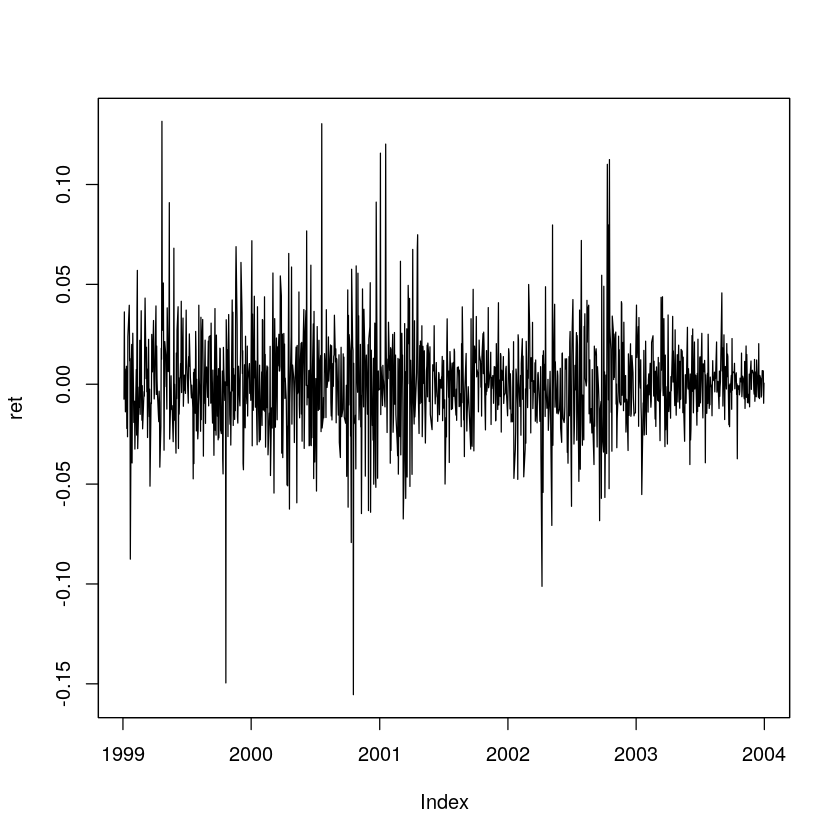

In [28]:
plot(ret)

In [8]:
spec <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean=FALSE))

In [30]:
# help(ugarchfit)

In [131]:
data <- zoo
fit <- ugarchfit(data = ret, spec = spec, solver="hybrid")

In [132]:
fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000001    0.000002   0.56769  0.57025
alpha1  0.042130    0.008328   5.05891  0.00000
beta1   0.956870    0.008117 117.88426  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000001    0.000011  0.12407  0.90126
alpha1  0.042130    0.026578  1.58515  0.11293
beta1   0.956870    0.027183 35.20093  0.00000

LogLikelihood : 2917.855 

Information Criteria
------------------------------------
                    
Akaike       -4.6415
Bayes        -4.6292
Shibata      -4.6415
Hannan-Quinn -4.6369

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
       

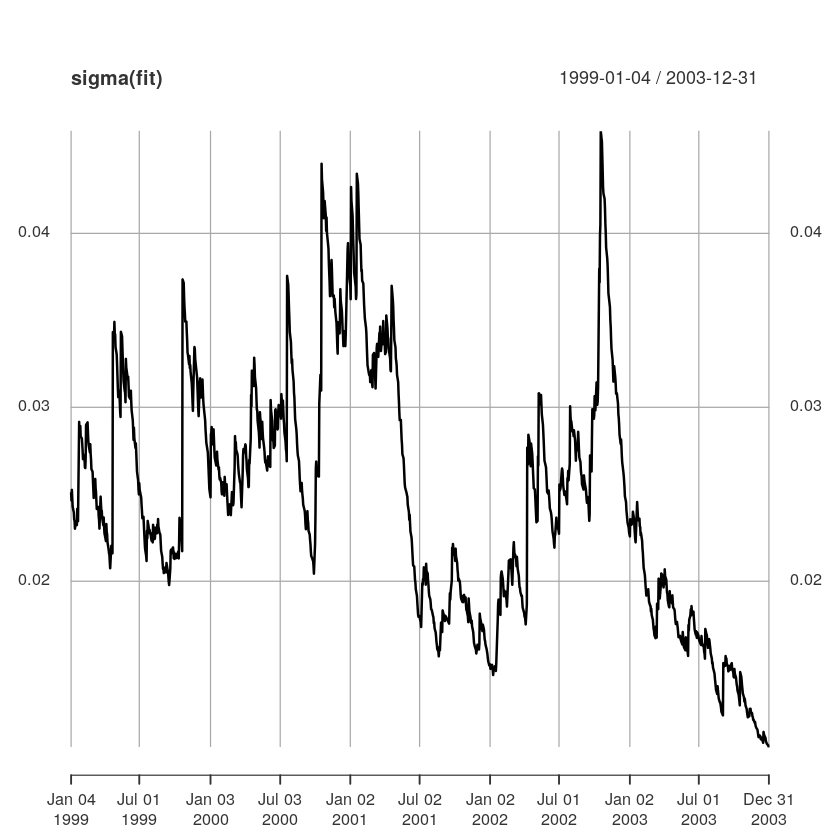

In [133]:
plot(sigma(fit))

### Compare with McDonald Chapter 24

![](./images/McDonald-IBM-GARCH.png)

In [134]:
vals <- coef(fit)
what <- coef(fit)[1]
ahat <- coef(fit)[2]
bhat <- coef(fit)[3]

In [135]:
what

omega 
1.397839e-06

In [136]:
ahat

alpha1 
0.04213009

In [137]:
bhat

beta1 
0.9568699

In [138]:
ret[76]

1999-04-22 
  0.131636 

In [139]:
ind <- (abs(ret) >= 0.12)
ret[ind]

1999-04-22 1999-10-21 2000-07-20 2000-10-18 2001-01-18 
  0.131636  -0.149533   0.130435  -0.155420   0.120233 

In [140]:
 ii <- 1:length(ret)

In [141]:
c(ii[ind])

[1]  76 203 391 454 516

In [148]:
spec2 <- ugarchspec(variance.model=list(model = "gjrGARCH", garchOrder=c(1,1,1)), mean.model=list(armaOrder=c(0,0), include.mean=F))

In [151]:
fit2 <- ugarchfit(data=ret, spec=spec2, solver="hybrid")

In [152]:
fit2


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000003    0.000003  0.79813 0.424794
alpha1  0.003790    0.005563  0.68119 0.495748
beta1   0.952995    0.010954 86.99676 0.000000
gamma1  0.084431    0.016816  5.02102 0.000001

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000003    0.000014  0.18586  0.85256
alpha1  0.003790    0.012459  0.30416  0.76101
beta1   0.952995    0.039385 24.19662  0.00000
gamma1  0.084431    0.051710  1.63279  0.10251

LogLikelihood : 2944.735 

Information Criteria
------------------------------------
                    
Akaike       -4.6827
Bayes        -4.6663
Shibata      -4.6827
Hannan-Quinn -4.6766

We